<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vicsek-Model" data-toc-modified-id="Vicsek-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vicsek Model</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parameters</a></span></li></ul></li><li><span><a href="#running-a-simulation" data-toc-modified-id="running-a-simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>running a simulation</a></span><ul class="toc-item"><li><span><a href="#generating-data" data-toc-modified-id="generating-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>generating data</a></span></li><li><span><a href="#animating-the-data" data-toc-modified-id="animating-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>animating the data</a></span></li><li><span><a href="#saving-data" data-toc-modified-id="saving-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>saving data</a></span></li><li><span><a href="#loading-the-data" data-toc-modified-id="loading-the-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>loading the data</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 3</a></span></li></ul></div>

In [1]:
import vicsek_model as vicsek
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
plt.style.use('seaborn-pastel')
%matplotlib notebook

# Vicsek Model

## Parameters
1. iterations: Number of timesteps
2. **N: Number of active particles**
3. v: Magnitude of velocity of active particles. All particles have the same velocity
4. **r: Interaction radius**
5. **eta: Noise in orientation** = $\eta$
6. L: side length of square periodic domain

Let, $\boldsymbol{p}_i(t) = (x_i(t), y_i(t))$, $\boldsymbol{v}_i(t)$ and $\theta(t)$ be the position, velocity and the orientation of the $i^{th}$ particle at time $t$

The timestep length is assumed to be $\delta t = 1$

Each timestep, the orientation of the particles are updated according to the rule
$$\theta_i(t+1) = \langle \theta_i(t) \rangle_r + \eta U(-\pi, \pi)$$

where, 
$$\langle \theta_i(t) \rangle_r = \frac{1}{\sum_{k=1}^{N} m(i, k)} \sum_{\substack{k=1 \\ d(i,k) < r \\ k \neq i}} ^ {N}\theta_k(t)$$

Here,$$m(i, k) = \begin{cases}
      1, & \text{if}\ d(i,k) < r \\
      0, & \text{otherwise}
    \end{cases}$$
    
$d(i,k)$ is the distance between the particles $i$ and $k$
    
and 
$U(-\pi, \pi)$ is a uniform random number sampled in the range $[-\pi, \pi]$
    
The velocity is  
$$\boldsymbol{v}_i(t+1) = v(cos(\theta_i(t+1), sin(\theta_i(t+1))$$

Finally, the positions are updated as
$$\boldsymbol{p}(t+1) = \boldsymbol{p}(t) + \boldsymbol{v}(t+1)$$



# running a simulation

## generating data

In [2]:
iterations = 1500
N = 2000
eta = 0.15
v = 0.10
r = 1.0
L = 32

x, y, orient = vicsek.generate_vicsek_data(iterations=iterations, N=N, eta=eta, v=v, r=r, L=L)

## animating the data

<IPython.core.display.Javascript object>


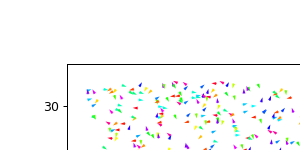

In [3]:
vicsek.animate_viscek(x, y, orient, iterations)

## saving data

In [4]:
name = 'n00001'
result_dir = 'vicsek_data/' + name + '/'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
    
np.save(result_dir + '/x.npy', x)  
np.save(result_dir + '/y.npy', y)
np.save(result_dir + '/orient.npy', orient)

params = {}
params['iterations'] = iterations
params['N'] = N
params['eta'] = eta
params['v'] = v
params['r'] = r
params['L'] = L

with open(result_dir + 'params.pkl', 'wb') as f:
    pickle.dump(params, f)

print('saving data for the parameters:', params)

saving data for the parameters: {'iterations': 1500, 'N': 2000, 'eta': 0.15, 'v': 0.1, 'r': 1.0, 'L': 32}


## loading the data

In [5]:
name = 'n00001'
result_dir = 'vicsek_data/' + name + '/'
with open(result_dir + 'params.pkl', 'rb') as f:
    params = pickle.load(f)
x = np.load(result_dir + '/x.npy')  
y = np.load(result_dir + '/y.npy')
orient = np.load(result_dir + '/orient.npy')

print('loading data for the parameters:', params)

loading data for the parameters: {'iterations': 1500, 'N': 2000, 'eta': 0.15, 'v': 0.1, 'r': 1.0, 'L': 32}


<IPython.core.display.Javascript object>


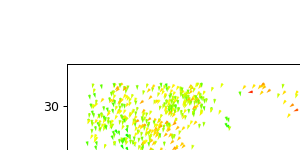

In [6]:
vicsek.animate_viscek(x, y, orient, iterations)

# Question 1



1a. Implement calculation of orientation order parameter 
$$\psi(t) = \frac{1}{N}|\sum \frac{\boldsymbol{v}_i(t)}{v}|$$

1b. Create a phase diagram of order parameter as a function of $N$ and $\eta$ (***long**)


# Question 2

2. Is order parameter sufficient to find emerging patterns? Is it able to find clusters? Write a code that can determine presence of clusters.

# Question 3

3. How does the transition from random to ordered motion happen? what is the nature of this transition?